#Carga de librerias y base de datos

In [1]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
from google.colab import drive
data = pd.read_csv('/content/drive/MyDrive/datosdeser.csv')

Mounted at /content/drive


<ipython-input-1-f67774bb496a>:5: DtypeWarning: Columns (3,8,9,10,15,19,25,26,27,28,31,34,35,43,45,46,48,49,50,51,52,53,54,55,56,57,58,59,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,98,99,100,101,102,103,104,107,120) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/drive/MyDrive/datosdeser.csv')


Primer filtro de limpieza de datos

In [2]:
# Handling missing values (busqueda de datos nulos)
# Check the number of missing values in each column (valores faltantes por columna)
Missing_values = data.isnull().sum()
Missing_values

# Check the percentage of missing values in each column (porcentaje)
Missing_percentage = (Missing_values / len(data)) * 100
Missing_percentage

,0
id,0.000000
file.x,0.000000
file.y,0.000000
eps,65.814680
ciudad_de_residencia,0.000000
...,...
data_estado,0.000000
data_fecha_de_admision,0.000000
data_forma_de_pago,0.000000
data_discapacidades,99.285377


In [3]:
#para una limpieza general vamos a eliminar los datos que tengan más del 50% faltantes
# Identify the columns with more than 50% missing values
columns_to_drop = Missing_percentage[Missing_percentage > 50].index

# Drop the identified columns from the DataFrame
#en un df almacene los valores que serán eliminados
datosl = data.drop(columns=columns_to_drop)
#aquí nuestro data se empieza a llamar 'datosl'

# Display the columns that were dropped
print(f"Columns dropped: {columns_to_drop}")

Columns dropped: Index(['eps', 'nivel_de_escolaridad', 'convenio', 'identidad_de_genero',
       'grupo_poblacional', 'tipo_de_desplazamiento',
       'cantidad_de_creditos_matriculados',
       'cantidad_de_creditos_matriculados_silla_vacia',
       'cantidad_de_creditos_cancelados', 'fecha_de_cancelacion_de_semestre',
       'deporte', 'pasatiempo', 'codigo_de_estado', 'fecha_de_inscripcion.x',
       'fecha_de_admision', 'segunda_opcion', 'tiene_liquidacion',
       'tiene_acceso_a_internet_desde_residencia',
       'medida_de_cantidad_de_horas_de_conexion_a_internet',
       'dispositivo_de_conexion_a_internet', 'grupo_de_sisben',
       'ciudad_de_nacimiento', 'tipo_de_identificacion_de_icfes',
       'identificacion_de_icfes', 'snp', 'icfes_matematicas', 'icfes_fisica',
       'icfes_lenguaje', 'icfes_lectura_critica', 'puntaje_entrevista',
       'estado_civil', 'regimen_salud', 'rh', 'es_victima_conflicto_armado',
       'es_victima_desplazamiento_forzado', 'sabe_ofimatica',
  

In [4]:
#verificar limpieza
print(datosl.columns)

Index(['id', 'file.x', 'file.y', 'ciudad_de_residencia', 'direccion',
       'fecha_nacimiento', 'edad', 'colegio', 'sector_educativo',
       'codigo_de_programa', 'programa', 'metodologia', 'facultad', 'jornada',
       'codigo_snies', 'tipo_de_aspirante', 'municipio', 'comuna', 'barrio',
       'estrato', 'etnia', 'genero', 'desplazado', 'periodo', 'sede', 'estado',
       'codigo_de_estudiante', 'nivel', 'fecha_de_matricula', 'forma_de_pago',
       'numero_de_asignaturas_matriculadas',
       'numero_de_asignaturas_matriculadas_silla_vacia',
       'numero_de_asignaturas_aprobadas',
       'numero_de_asignaturas_aprobadas_silla_vacia', 'creditos_aprobados',
       'fecha_iam', 'semestre', 'file_grupos', 'Facultad',
       'forma_de_pago_agrupada', 'EdadConDefault', 'data_fecha_nacimiento',
       'data_estado_civil', 'data_rh', 'data_ciudad_de_residencia',
       'data_comuna_de_residencia', 'data_direccion', 'data_tipo_de_vivienda',
       'data_edad', 'data_metodologia', 'data_c

In [5]:
#visualizamos nuevamente el data
datosl.head()

,id,file.x,file.y,ciudad_de_residencia,direccion,fecha_nacimiento,edad,colegio,sector_educativo,codigo_de_programa,...,data_barrio,data_estrato,data_etnia,data_genero,data_periodo,data_sede,data_estado,data_fecha_de_admision,data_forma_de_pago,fecha_de_inscripcion.y
0,11354,matriculados_20151.xlsx,desertores_20201.xlsx,MEDELLÍN (ANTIOQUIA),CARRERA 94 77 DD 61,1997-09-12,26.0,NaN,NaN,14.0,...,MEDELLÍN,2,Afrodescendiente,Masculino,20191,SEDE ROBLEDO,Retiro Voluntario,2014-12-09,PRESUPUESTO PARTICIPATIVO,2019-08-01
1,12549,matriculados_20151.xlsx,desertores_20161.xlsx,MEDELLÍN (ANTIOQUIA),CALLE 110 CARRERA 76 N 11,1997-05-25,26.0,NaN,NaN,14.0,...,MEDELLÍN,2,Mestizo(Mayoria Colombia),Masculino,20151,SEDE ROBLEDO,Retiro Voluntario,2014-12-09,RECURSOS PROPIOS,2015-08-01
2,12557,matriculados_20151.xlsx,desertores_20161.xlsx,CALDAS (ANTIOQUIA),CALLE 127 B SUR 53 35,1997-07-01,26.0,NaN,NaN,14.0,...,CALDAS,3,Mestizo(Mayoria Colombia),Masculino,20151,SEDE ROBLEDO,Retiro Voluntario,2014-12-09,RECURSOS PROPIOS,2015-08-01
3,10288,matriculados_20151.xlsx,desertores_20162.xlsx,MEDELLÍN (ANTIOQUIA),CALLE 104 A 64 D 25 APTO 301,1995-04-15,28.0,NaN,NaN,14.0,...,Girardot,3,Mestizo(Mayoria Colombia),Masculino,20152,SEDE ROBLEDO,Retiro Voluntario,1900-01-01,RECURSOS PROPIOS,2015-01-01
4,11622,matriculados_20151.xlsx,desertores_20171.xlsx,MEDELLÍN (ANTIOQUIA),CALLE 75 NO 50 26,1977-11-16,46.0,NaN,NaN,14.0,...,BARBACOAS,3,Caucasico,Masculino,20161,SEDE ROBLEDO,Retiro Voluntario,1900-01-01,RECURSOS PROPIOS,2016-08-01


In [6]:
# verficamos los datos nulos
Missing_values = datosl.isnull().sum()
Missing_values

,0
id,0
file.x,0
file.y,0
ciudad_de_residencia,0
direccion,0
...,...
data_sede,0
data_estado,0
data_fecha_de_admision,0
data_forma_de_pago,0


Segundo filtro de limpieza

In [7]:
#en una columna se ubican las variables para seleccionar las variables de interes
# bien sea para amputar o ajustar con media/mediana

# Ver todas las columnas del DataFrame 'datosl'
# Imprimir cada nombre de columna en una nueva línea
for column in datosl.columns:
    print(column)


id
file.x
file.y
ciudad_de_residencia
direccion
fecha_nacimiento
edad
colegio
sector_educativo
codigo_de_programa
programa
metodologia
facultad
jornada
codigo_snies
tipo_de_aspirante
municipio
comuna
barrio
estrato
etnia
genero
desplazado
periodo
sede
estado
codigo_de_estudiante
nivel
fecha_de_matricula
forma_de_pago
numero_de_asignaturas_matriculadas
numero_de_asignaturas_matriculadas_silla_vacia
numero_de_asignaturas_aprobadas
numero_de_asignaturas_aprobadas_silla_vacia
creditos_aprobados
fecha_iam
semestre
file_grupos
Facultad
forma_de_pago_agrupada
EdadConDefault
data_fecha_nacimiento
data_estado_civil
data_rh
data_ciudad_de_residencia
data_comuna_de_residencia
data_direccion
data_tipo_de_vivienda
data_edad
data_metodologia
data_codigo_de_programa
data_programa
data_plan_de_estudio
data_jornada
data_barrio
data_estrato
data_etnia
data_genero
data_periodo
data_sede
data_estado
data_fecha_de_admision
data_forma_de_pago
fecha_de_inscripcion.y


In [8]:
# Vamos a eliminar las variables que no serán de interés en nuestro estudio
columns_to_drop = [
    'file.x', 'id', 'file.y', 'ciudad_de_residencia', 'direccion', 'colegio', 'sector_educativo',
    'codigo_de_programa', 'codigo_snies', 'comuna', 'barrio', 'codigo_de_estudiante',
    'numero_de_asignaturas_matriculadas_silla_vacia', 'numero_de_asignaturas_aprobadas_silla_vacia',
    'fecha_iam', 'file_grupos', 'forma_de_pago_agrupada', 'EdadConDefault', 'data_estado_civil',
    'data_rh', 'data_comuna_de_residencia', 'data_direccion', 'data_edad', 'data_metodologia',
    'data_codigo_de_programa', 'data_programa', 'data_plan_de_estudio', 'data_jornada', 'data_barrio',
    'data_estrato', 'data_etnia', 'data_genero', 'data_periodo', 'data_sede', 'data_estado',
    'data_fecha_de_admision', 'data_forma_de_pago','fecha_de_matricula','periodo'
]

# Eliminar las columnas del DataFrame
datosl = datosl.drop(columns=columns_to_drop)

# Verificación: mostramos las primeras filas del DataFrame después de la eliminación
print(datosl.head())


  fecha_nacimiento  edad              programa metodologia    facultad  \
0       1997-09-12  26.0  INGENIERÍA ELÉCTRICA  Presencial  Ingeniería   
1       1997-05-25  26.0  INGENIERÍA ELÉCTRICA  Presencial  Ingeniería   
2       1997-07-01  26.0  INGENIERÍA ELÉCTRICA  Presencial  Ingeniería   
3       1995-04-15  28.0  INGENIERÍA ELÉCTRICA  Presencial  Ingeniería   
4       1977-11-16  46.0  INGENIERÍA ELÉCTRICA  Presencial  Ingeniería   

  jornada         tipo_de_aspirante municipio  estrato  \
0  DIURNA     TRANSFERENCIA EXTERNA  MEDELLÍN        2   
1  DIURNA  ESTUDIOS POR PRIMERA VEZ  MEDELLÍN        2   
2  DIURNA  ESTUDIOS POR PRIMERA VEZ    CALDAS        3   
3  DIURNA  ESTUDIOS POR PRIMERA VEZ  MEDELLÍN        3   
4  DIURNA  ESTUDIOS POR PRIMERA VEZ  MEDELLÍN        3   

                       etnia  ...     forma_de_pago  \
0           Afrodescendiente  ...  RECURSOS PROPIOS   
1  Mestizo(Mayoria Colombia)  ...  RECURSOS PROPIOS   
2  Mestizo(Mayoria Colombia)  ...  RECURS

In [9]:
# Imprimir variables en una columna
for column in datosl.columns:
    print(column)

fecha_nacimiento
edad
programa
metodologia
facultad
jornada
tipo_de_aspirante
municipio
estrato
etnia
genero
desplazado
sede
estado
nivel
forma_de_pago
numero_de_asignaturas_matriculadas
numero_de_asignaturas_aprobadas
creditos_aprobados
semestre
Facultad
data_fecha_nacimiento
data_ciudad_de_residencia
data_tipo_de_vivienda
fecha_de_inscripcion.y


Tercer filtro de limpieza, repeticiòn de la primera pero sobre el 10% de los faltantes.

In [10]:
# Calculate missing values and percentages (calculamos nuevamente los el valor de datos faltantes)
Missing_values = datosl.isnull().sum()
Missing_percentage = (Missing_values / len(datosl)) * 100

# Create a DataFrame for missing data analysis (crear df para el analsiis de datos faltantes)
missing_data = pd.DataFrame({
    'column_name': Missing_values.index,
    'missing_count': Missing_values.values,
    'missing_percentage': Missing_percentage.values
})

# Now you can filter: (filtramos los datos sobre el 10%)
#Esta parte es la condición del filtro. Se está buscando
#dentro del DataFrame missing_data todas las filas donde
#la columna missing_percentage (porcentaje de datos faltantes) sea mayor que 10.
missing_data = missing_data[missing_data['missing_percentage'] > 10]

# Display the filtered DataFrame (muestra el df
#que ha pasado por el filtro en conteo y porcentaje)
print(missing_data)

                           column_name  missing_count  missing_percentage
1                                 edad          46483           46.719870
4                             facultad          46483           46.719870
7                            municipio          46483           46.719870
11                          desplazado          46483           46.719870
13                              estado          19481           19.580272
14                               nivel          46483           46.719870
15                       forma_de_pago          46483           46.719870
16  numero_de_asignaturas_matriculadas          46483           46.719870
17     numero_de_asignaturas_aprobadas          46483           46.719870
18                  creditos_aprobados          47565           47.807383


In [11]:
#observamos que variables cómo la edad, facultad etc,
#tienen alto porcentaje de faltantes
#sin embargo alguna se pueden completar con la media o mediana,
# dado que si la distribución es simétrica, puedes usar la media.
#Si es asimétrica, la mediana.



variable númerica continua

In [12]:
# Imputar edad con la mediana
datosl['edad'].fillna(datosl['edad'].median(), inplace=True)
#el aviso de abajo nos explica que nuestro df fue modificado

<ipython-input-12-f161220a6f40>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datosl['edad'].fillna(datosl['edad'].median(), inplace=True)


In [13]:
# Imputar número de asignaturas y créditos aprobados con la mediana
numerical_vars = ['numero_de_asignaturas_matriculadas', 'numero_de_asignaturas_aprobadas', 'creditos_aprobados']
for var in numerical_vars:
    datosl[var].fillna(datosl[var].median(), inplace=True)

<ipython-input-13-5b0495a1c79e>:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datosl[var].fillna(datosl[var].median(), inplace=True)


Variables categóricas

In [14]:
# Imputar variables categóricas con 'Desconocido'
# Este paso se realiza porque si eliminanos los datos faltantes o rellenás con la moda,
#podríamos ocultar un patrón importante, sobre todo si el "no reportar" se asocia a la deserción.


categorical_vars = ['facultad', 'municipio', 'desplazado', 'estado', 'nivel', 'forma_de_pago']
for var in categorical_vars:
    datosl[var].fillna('Desconocido', inplace=True)


<ipython-input-14-062d257a7fb7>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  datosl[var].fillna('Desconocido', inplace=True)
<ipython-input-14-062d257a7fb7>:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Desconocido' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  datosl[var].fillna('Desconocido', inplace=True)


In [15]:
# Verificar valores faltantes
print(datosl.isnull().sum())

fecha_nacimiento                      0
edad                                  0
programa                              0
metodologia                           0
facultad                              0
jornada                               0
tipo_de_aspirante                     0
municipio                             0
estrato                               0
etnia                                 0
genero                                0
desplazado                            0
sede                                  0
estado                                0
nivel                                 0
forma_de_pago                         0
numero_de_asignaturas_matriculadas    0
numero_de_asignaturas_aprobadas       0
creditos_aprobados                    0
semestre                              0
Facultad                              0
data_fecha_nacimiento                 0
data_ciudad_de_residencia             0
data_tipo_de_vivienda                 0
fecha_de_inscripcion.y                0


Cambio de nombre de las variables

In [16]:
#cambiamos las variables en base a la caracterización de la UdeA

In [17]:
# Renombrar columnas del DataFrame 'datosl'
datosl.rename(columns={
    'edad': 'Edad',
    'estrato': 'Estrato social',
    'etnia': 'Autoreconocimiento étnico',
    'fecha_nacimiento': 'Fecha de nacimiento',
    'facultad': 'Facultad',
    'programa': 'Programa',
    'sede': 'Sede',
    'metodologia': 'Tipo de programa',
    'estado': 'Estado',
    'desplazado': 'Víctima de conflicto armado'
}, inplace=True)

Correción errores tipograficos

In [18]:
#Corrección de Errores Tipográficos e Inconsistencias

# Convertir todos los nombres de programas a mayúsculas y quitar espacios extra
datosl['Programa'] = datosl['Programa'].str.upper().str.strip()

# Capitalizar (primera letra en mayúscula) los valores de 'Tipo de programa'
datosl['Tipo de programa'] = datosl['Tipo de programa'].str.capitalize()

# Convertir la columna 'Fecha de nacimiento' al tipo datetime
datosl['Fecha de nacimiento'] = pd.to_datetime(datosl['Fecha de nacimiento'], errors='coerce')


# Calcular la edad en años
from datetime import datetime
datosl['Edad'] = datosl['Fecha de nacimiento'].apply(lambda x: datetime.now().year - x.year if pd.notnull(x) else None)


# Categorizar las edades en rangos
datosl['edad_rango'] = pd.cut(datosl['Edad'], bins=[0, 18, 25, 35, 50, 100], labels=['0-18', '19-25', '26-35', '36-50', '51+'])

# Mostramos un resumen de los datos limpios
datosl.head()

,Fecha de nacimiento,Edad,Programa,Tipo de programa,Facultad,jornada,tipo_de_aspirante,municipio,Estrato social,Autoreconocimiento étnico,...,numero_de_asignaturas_matriculadas,numero_de_asignaturas_aprobadas,creditos_aprobados,semestre,Facultad,data_fecha_nacimiento,data_ciudad_de_residencia,data_tipo_de_vivienda,fecha_de_inscripcion.y,edad_rango
0,1997-09-12,28,INGENIERÍA ELÉCTRICA,Presencial,Ingeniería,DIURNA,TRANSFERENCIA EXTERNA,MEDELLÍN,2,Afrodescendiente,...,6.0,5.0,12.0,1,Facultad de Ingeniería,1997-09-12,MEDELLÍN,Familiar,2019-08-01,26-35
1,1997-05-25,28,INGENIERÍA ELÉCTRICA,Presencial,Ingeniería,DIURNA,ESTUDIOS POR PRIMERA VEZ,MEDELLÍN,2,Mestizo(Mayoria Colombia),...,6.0,4.0,10.0,1,Facultad de Ingeniería,1997-05-25,MEDELLÍN,Familiar,2015-08-01,26-35
2,1997-07-01,28,INGENIERÍA ELÉCTRICA,Presencial,Ingeniería,DIURNA,ESTUDIOS POR PRIMERA VEZ,CALDAS,3,Mestizo(Mayoria Colombia),...,6.0,2.0,6.0,1,Facultad de Ingeniería,1997-07-01,CALDAS,Familiar,2015-08-01,26-35
3,1995-04-15,30,INGENIERÍA ELÉCTRICA,Presencial,Ingeniería,DIURNA,ESTUDIOS POR PRIMERA VEZ,MEDELLÍN,3,Mestizo(Mayoria Colombia),...,4.0,0.0,44.0,1,Facultad de Ingeniería,1995-04-15,MEDELLÍN,Familiar,2015-01-01,26-35
4,1977-11-16,48,INGENIERÍA ELÉCTRICA,Presencial,Ingeniería,DIURNA,ESTUDIOS POR PRIMERA VEZ,MEDELLÍN,3,Caucasico,...,4.0,2.0,21.0,1,Facultad de Ingeniería,1977-11-16,MEDELLÍN,Familiar,2016-08-01,36-50


#Resumen de la limpieza
* Primero cargue los datos y revise la cantidad de faltantes.
* Eliminación de columnas con más de 50% variables faltantes
* revisión de columnas con el 10% faltantes
* tercer filtro de limpieza
* complemento de variables númericas

# Estadística descriptiva

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


# Descripción de variables numéricas
print(datosl.describe())

# Descripción de variables categóricas
print(datosl.describe(include=['object']))


                 Fecha de nacimiento          Edad  Estrato social  \
count                          99493  99493.000000    99493.000000   
mean   1995-03-28 23:21:10.075281664     30.261878        1.956922   
min              1900-01-01 00:00:00      8.000000        0.000000   
25%              1992-06-09 00:00:00     26.000000        1.000000   
50%              1996-08-04 00:00:00     29.000000        2.000000   
75%              1999-08-17 00:00:00     33.000000        2.000000   
max              2017-02-18 00:00:00    125.000000        6.000000   
std                              NaN      6.462313        0.804213   

       numero_de_asignaturas_matriculadas  numero_de_asignaturas_aprobadas  \
count                        99493.000000                     99493.000000   
mean                             4.622385                         2.937051   
min                              0.000000                         0.000000   
25%                              5.000000                

Preparación de las variables

In [20]:
# Eliminar columna duplicada
#creamos la condición si encuentra Facultad repetido la elimina
if 'Facultad' in datosl.columns:
    datosl.drop(columns=['Facultad'], inplace=True)
else:
    print("Column 'Facultad' not found in DataFrame.")

In [21]:
#notamos que tenemos edades extrememas còmo 125 años y 8 años
# Filtrar edades razonables
datosl = datosl[(datosl['Edad'] >= 15) & (datosl['Edad'] <= 65)]

#el estrato social en Colombia va de 1 a 6, tenemos estratos en 6
datosl['Estrato social'] = datosl['Estrato social'].replace(0, np.nan)

# Crear variable binaria para deserción
datosl['deserto'] = datosl['Estado'].apply(lambda x: 1 if x == 'Desertó' else 0)

<ipython-input-21-0f0bb4c873de>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  datosl['Estrato social'] = datosl['Estrato social'].replace(0, np.nan)


In [22]:
print(datosl.describe(include=['object']))

                                 Programa Tipo de programa jornada  \
count                               99350            99350   99350   
unique                                 50                4       5   
top     TECNOLOGÍA EN MECÁNICA AUTOMOTRIZ       Presencial  DIURNA   
freq                                15407            90295   44936   

               tipo_de_aspirante    municipio  Autoreconocimiento étnico  \
count                      99350        99350                      99350   
unique                        12          147                         12   
top     ESTUDIOS POR PRIMERA VEZ  Desconocido  Mestizo(Mayoria Colombia)   
freq                       55191        46411                      66825   

           genero Víctima de conflicto armado          Sede       Estado  \
count       99350                       99350         99350        99350   
unique          3                           3            62           16   
top     Masculino                       

In [23]:
# Ver municipios únicos
municipios_unicos = datosl['municipio'].unique()
print(municipios_unicos)

['MEDELLÍN' 'CALDAS' 'CONCORDIA' 'BELLO' 'ENVIGADO' 'APARTADÓ'
 'COPACABANA' 'ITAGÜÍ' 'CALI' 'GIRARDOTA' 'LA UNIÓN' 'AMAGÁ' 'SABANETA'
 'RIONEGRO' 'CAUCASIA' 'SAN JERÓNIMO' 'MONTELÍBANO' 'LA ESTRELLA'
 'CISNEROS' 'LA CEJA' 'GUARNE' 'SAN SEBASTIÁN DE MARIQUITA' 'BARBOSA'
 'EBÉJICO' 'SAN VICENTE FERRER' 'SAN PEDRO DE LOS MILAGROS'
 'SAN CRISTÓBAL' 'URRAO' 'EL BAGRE' 'SOPETRÁN' 'MUTATÁ'
 'SAN VICENTE DE CHUCURÍ' 'PROVIDENCIA' 'BELMIRA' 'PUERTO BERRÍO'
 'SAN LUIS' 'EL CARMEN DE VIBORAL' 'MARINILLA' 'TÁMESIS' 'SAN PEDRO'
 'SAN ANDRÉS' 'VENECIA' 'PUERTO NARE' 'OLAYA' 'NECOCLÍ' 'GUATAPÉ' 'TAME'
 'SANTA ROSA DE OSOS' 'PUERTO TRIUNFO' 'YARUMAL' 'TARSO' 'CAREPA'
 'SANTO DOMINGO' 'DONMATÍAS' 'SAN ANDRÉS DE TUMACO' 'PUERTO BOYACÁ'
 'ENTRERRÍOS' 'LIBORINA' 'SABANALARGA' 'YOLOMBÓ' 'CAÑASGORDAS' 'GUADALUPE'
 'ANORÍ' 'GÓMEZ PLATA' 'CAROLINA' 'SANTA FÉ DE ANTIOQUIA' 'GIRALDO'
 'SANTA MARTA' 'REMEDIOS' 'HISPANIA' 'COCORNÁ' 'FREDONIA' 'EL SANTUARIO'
 'ALBANIA' 'ABEJORRAL' 'SAN RAFAEL' 'SAN ROQUE' 'CARTAG

Text(0, 0.5, 'Frecuencia')

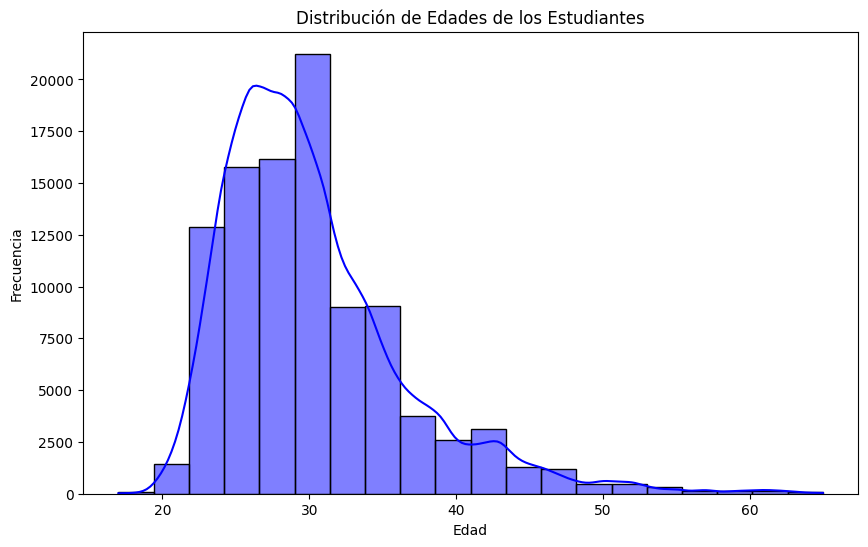

In [24]:
# Distribución de Edades
plt.figure(figsize=(10, 6))
sns.histplot(datosl['Edad'].dropna(), bins=20, kde=True, color='blue')
plt.title('Distribución de Edades de los Estudiantes')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
# plt.show()

Análisis de la variable objetivo: estado


Estado
Matriculado                                 32711
Desconocido                                 19447
Admitido                                    19390
Retiro Académico                            16675
Pendiente de Pago                            3937
Cancelación reglamentaria                    2599
Aprobado                                     1973
No Admitido                                   831
En Revisión                                   597
Egresado                                      473
Graduado                                      222
Retiro Definitivo                             167
Inscrito                                      125
No Aprobado                                   111
Matricula Especial                             91
Retiro Voluntario por Cambio de programa        1
Name: count, dtype: int64


<ipython-input-25-84d9de046407>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=datosl, y='Estado', order=datosl['Estado'].value_counts().index, palette='viridis')


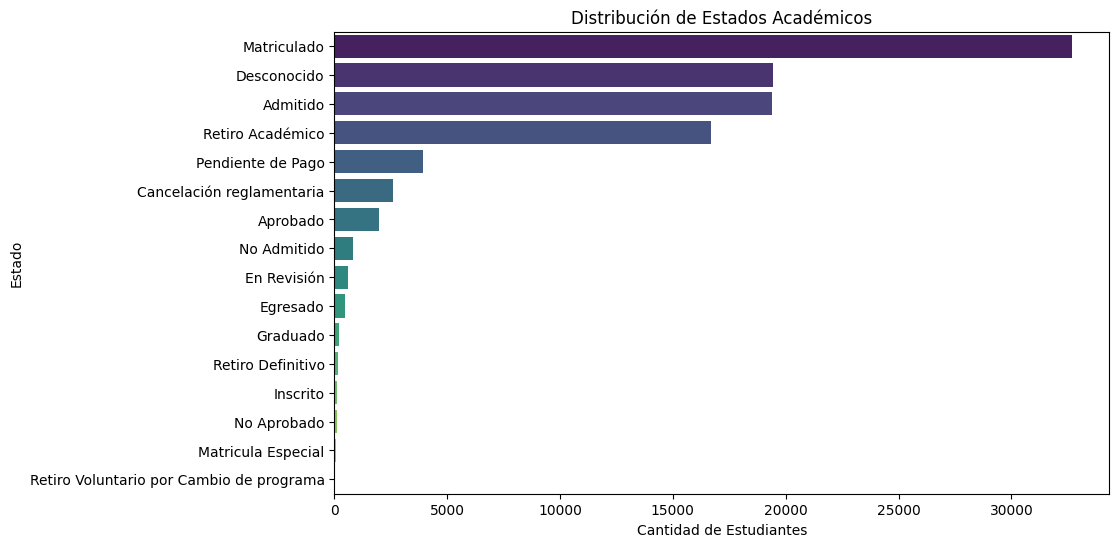

In [25]:
# Frecuencia de cada estado
print(datosl['Estado'].value_counts())

# Visualización
plt.figure(figsize=(10,6))
sns.countplot(data=datosl, y='Estado', order=datosl['Estado'].value_counts().index, palette='viridis')
plt.title('Distribución de Estados Académicos')
plt.xlabel('Cantidad de Estudiantes')
plt.ylabel('Estado')
plt.show()


In [26]:
#dado que desertor tiene muchas columnas
#crearemos una variable binaria 1/0
# Convertir en variable binaria
datosl['desertor'] = datosl['Estado'].apply(lambda x: 1 if x in ['Desertor', 'Abandono', 'Cancelado'] else 0)

# Revisar distribución
print(datosl['desertor'].value_counts())


desertor
0    99350
Name: count, dtype: int64


#Cruces clave con variables socioeconómicas

In [27]:
#Vamos a ver cómo se comporta el estado con respecto a:
#estrato
#forma_de_pago
#etnia
#municipio
#genero
#desplazado (o víctima de conflicto armado)

In [28]:
#renombramos nuevamente las variables para evitar errores
datosl.rename(columns={
        'edad': 'Edad',
        'estrato': 'Estrato social',
        'etnia': 'Autoreconocimiento étnico',
        'fecha_nacimiento': 'Fecha de nacimiento',
        'facultad': 'Facultad',
        'programa': 'Programa',
        'sede': 'Sede',
        'metodologia': 'Tipo de programa',
        'estado': 'Estado',
        'desplazado': 'Víctima de conflicto armado'
    }, inplace=True)

<ipython-input-29-e9bb0f1e290f>:2: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.countplot(data=datosl, x='Estrato social', hue='desertor',


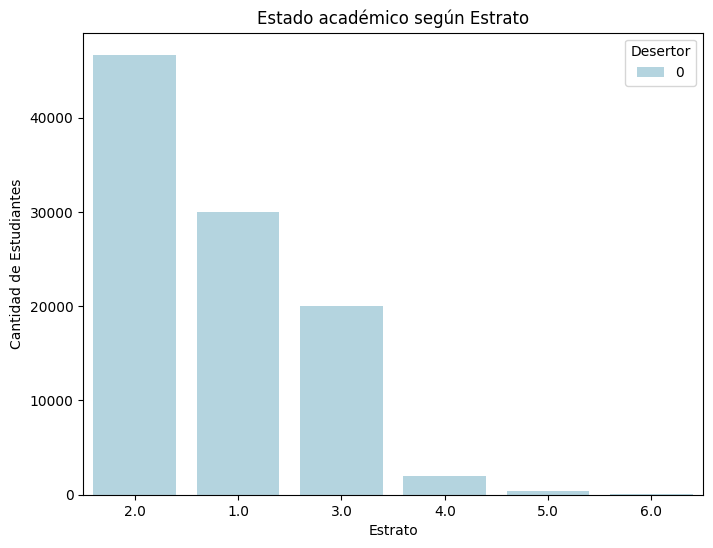

In [29]:
plt.figure(figsize=(8, 6))
sns.countplot(data=datosl, x='Estrato social', hue='desertor',
              palette=['lightblue', 'lightcoral'],
              order=datosl['Estrato social'].value_counts().index)
plt.title('Estado académico según Estrato')
plt.xlabel('Estrato')
plt.ylabel('Cantidad de Estudiantes')
plt.legend(title='Desertor')
plt.show()

Forma de pago

In [30]:
#ver categorias de forma de pago
datosl['forma_de_pago'].unique()

array(['RECURSOS PROPIOS', 'PRESUPUESTO PARTICIPATIVO',
       'FONDO EPM - COMFAMA', 'ICETEX - LINEAS TRADICIONALES',
       'ICETEX - FONDOS CAMINO A LA EDUCACIÓN SUPERIOR PP',
       'ICETEX - FONDO POBLACION VICTIMA MEN',
       'ICETEX - FONDO COPIDROGAS SUPERIOR',
       'SAPIENCIA - PRESUPUESTO PARTICIPATIVO', 'MUNICIPIO DE ITAGUI',
       'SAPIENCIA - MEJORES BACHILLERES',
       'SUPERE - MUNICIPIO DE ENVIGADO',
       'COONORTE LTDA, COONORTE LTDA - SEGURO ESTUDIANTIL', 'COOPETRABAN',
       'CORPORACION GILBERTO ECHEVERRI MEJIA',
       'FUNDACION FRATERNIDAD MEDELLIN', 'COOSANLUIS',
       'FUNDACION FOMENTO A LA EDUCACION J.C.H.', 'CONFECOOP',
       'CESANTÍAS',
       'MICROEMPRESAS, MICROEMPRESAS - CARNÉ, MICROEMPRESAS - SEGURO Y CARNÉ',
       'MICROEMPRESAS', 'OLIMPIADAS, PRESUPUESTO PARTICIPATIVO',
       'BOOTCAMP', 'BOOTCAMP, MICROEMPRESAS', 'SAPIENCIA 189 - 20182',
       'SAPIENCIA 301 - 20191', 'SAPIENCIA 097 - 20172',
       'SAPIENCIA 137 - 20181',
       'MIC

dado que tenemos muchas categorias,
vamos a categorizar de forma màs general
Agrupación propuesta
Recursos Propios → 'RECURSOS PROPIOS', 'SALDO A FAVOR', 'CESANTÍAS', 'DEDUCCION POR NOMINA'.

ICETEX → Cualquier categoría que empiece con 'ICETEX'.

Sapiencia → 'SAPIENCIA' en cualquiera de sus formas.

Matrícula Cero → Cualquier categoría que contenga 'MATRICULA CERO' o 'POLITICA DE GRATUIDAD - MEN'.

Presupuesto Participativo → 'PRESUPUESTO PARTICIPATIVO' y 'SAPIENCIA - PRESUPUESTO PARTICIPATIVO'.

Fondos de Empresas/Cooperativas/Fundaciones → 'COOPETRABAN', 'CONFECOOP', 'FUNDACION FRATERNIDAD MEDELLIN', 'FUNDACION AURELIO LLANO POSADA', etc.

Generación E - MEN → Cualquier categoría que contenga 'GENERACION E - MEN'.

Otros Subsidios → Cualquier otra opción no incluida en las anteriores.

In [31]:

def categorizar_pago(fp):
    if 'RECURSOS PROPIOS' in fp or 'SALDO A FAVOR' in fp or 'CESANTÍAS' in fp or 'DEDUCCION POR NOMINA' in fp:
        return 'Recursos Propios'
    elif 'ICETEX' in fp:
        return 'ICETEX'
    elif 'SAPIENCIA' in fp:
        return 'Sapiencia'
    elif 'MATRICULA CERO' in fp or 'POLITICA DE GRATUIDAD - MEN' in fp:
        return 'Matrícula Cero'
    elif 'PRESUPUESTO PARTICIPATIVO' in fp:
        return 'Presupuesto Participativo'
    elif any(org in fp for org in ['COOPETRABAN', 'CONFECOOP', 'FUNDACION', 'MICROEMPRESAS', 'EMPRESAS']):
        return 'Fondos Empresas/Cooperativas/Fundaciones'
    elif 'GENERACION E - MEN' in fp:
        return 'Generación E - MEN'
    else:
        return 'Otros Subsidios'

# Aplicar la función
datosl['forma_de_pago_simplificada'] = datosl['forma_de_pago'].apply(categorizar_pago)

# Verificar los cambios
print(datosl['forma_de_pago_simplificada'].value_counts())


forma_de_pago_simplificada
Otros Subsidios                             46896
Recursos Propios                            28528
Matrícula Cero                              10287
Sapiencia                                    7911
Presupuesto Participativo                    4701
Fondos Empresas/Cooperativas/Fundaciones      568
Generación E - MEN                            430
ICETEX                                         29
Name: count, dtype: int64


<ipython-input-32-8b03ccce5d84>:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tasa_df.reset_index(), x='forma_de_pago_simplificada', y='tasa_desercion', palette='rocket')


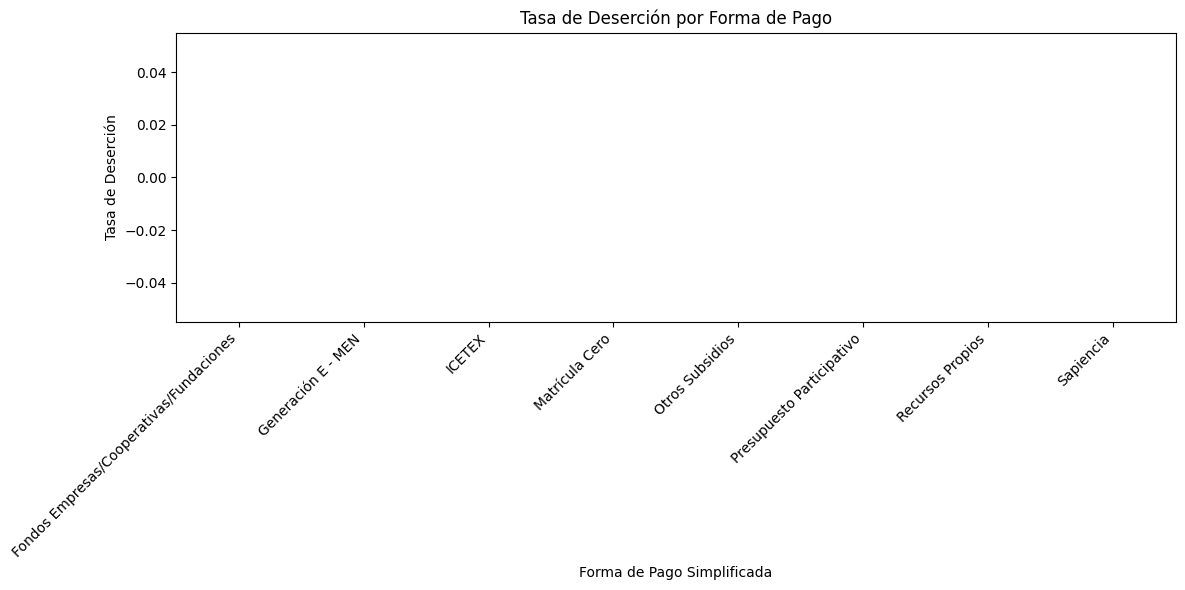

                                          tasa_desercion  cantidad
forma_de_pago_simplificada                                        
Fondos Empresas/Cooperativas/Fundaciones             0.0       568
Generación E - MEN                                   0.0       430
ICETEX                                               0.0        29
Matrícula Cero                                       0.0     10287
Otros Subsidios                                      0.0     46896
Presupuesto Participativo                            0.0      4701
Recursos Propios                                     0.0     28528
Sapiencia                                            0.0      7911


In [32]:
# Asegurarnos de tener la variable binaria 'desertor'
# (si ya la habías creado puedes saltarte esta parte)
datosl['desertor'] = datosl['Estado'].apply(lambda x: 1 if x in ['Retirado', 'No matriculado', 'Cancelado'] else 0)

# Agrupar por forma de pago y calcular tasa de deserción
tasa_desercion = datosl.groupby('forma_de_pago_simplificada')['desertor'].mean().sort_values(ascending=False)

# Contar también los casos por categoría para mostrar junto a la gráfica
conteos = datosl['forma_de_pago_simplificada'].value_counts()

# Unimos tasa + cantidad para visualizar mejor
tasa_df = tasa_desercion.to_frame(name='tasa_desercion')
tasa_df['cantidad'] = conteos

# Visualizamos
plt.figure(figsize=(12, 6))
sns.barplot(data=tasa_df.reset_index(), x='forma_de_pago_simplificada', y='tasa_desercion', palette='rocket')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Forma de Pago Simplificada')
plt.ylabel('Tasa de Deserción')
plt.title('Tasa de Deserción por Forma de Pago')
plt.tight_layout()
plt.show()

# Mostrar los datos en tabla
print(tasa_df.sort_values(by='tasa_desercion', ascending=False))


In [33]:
print(datosl['Estado'].value_counts())

Estado
Matriculado                                 32711
Desconocido                                 19447
Admitido                                    19390
Retiro Académico                            16675
Pendiente de Pago                            3937
Cancelación reglamentaria                    2599
Aprobado                                     1973
No Admitido                                   831
En Revisión                                   597
Egresado                                      473
Graduado                                      222
Retiro Definitivo                             167
Inscrito                                      125
No Aprobado                                   111
Matricula Especial                             91
Retiro Voluntario por Cambio de programa        1
Name: count, dtype: int64


In [34]:
#vamos a definir mejor la variable desertor
# Definimos los estados desertores
estados_desertores = [
    'Retiro Académico',
    'Cancelación reglamentaria',
    'Retiro Definitivo',
    'Retiro Voluntario por Cambio de programa'
]

# Creamos variable binaria: 1 si desertó, 0 si no, NaN si no se puede determinar
datosl['desertor'] = datosl['Estado'].apply(
    lambda x: 1 if x in estados_desertores else (0 if x in [
        'Matriculado', 'Aprobado', 'Egresado', 'Graduado', 'Matricula Especial'] else None)
)



In [35]:
# Asegurarse de no tener valores nulos en la agrupación
df_desercion_pago = datosl.dropna(subset=['desertor']).groupby('forma_de_pago_simplificada')['desertor'].agg(['mean', 'count'])
df_desercion_pago.rename(columns={'mean': 'tasa_desercion', 'count': 'cantidad'}, inplace=True)
print(df_desercion_pago.sort_values('tasa_desercion', ascending=False))


                                          tasa_desercion  cantidad
forma_de_pago_simplificada                                        
Matrícula Cero                                  0.475649     10287
Generación E - MEN                              0.462791       430
Sapiencia                                       0.424346      7911
Presupuesto Participativo                       0.325675      4701
Recursos Propios                                0.320387     28528
Fondos Empresas/Cooperativas/Fundaciones        0.316901       568
ICETEX                                          0.172414        29
Otros Subsidios                                 0.055736      2458


<ipython-input-36-ab46403fc490>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_desercion_pago, x='forma_de_pago_simplificada', y='tasa_desercion', palette='coolwarm')


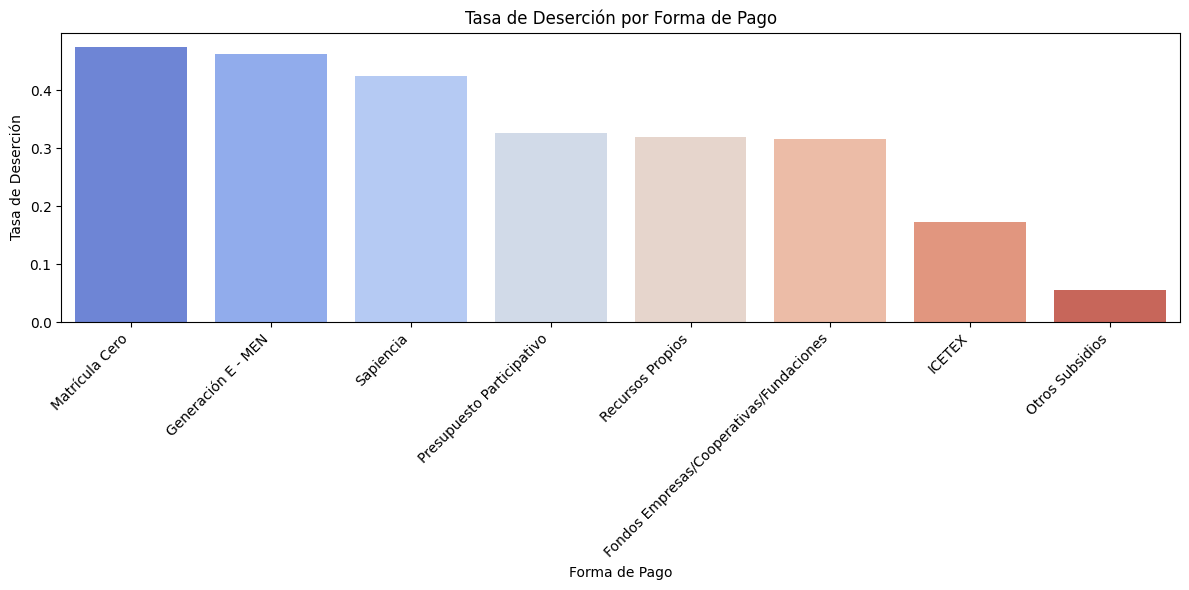

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

# Reset index para graficar con seaborn
df_desercion_pago = df_desercion_pago.reset_index()

# Ordenar de mayor a menor tasa de deserción
df_desercion_pago = df_desercion_pago.sort_values(by='tasa_desercion', ascending=False)

# Crear gráfica
plt.figure(figsize=(12, 6))
sns.barplot(data=df_desercion_pago, x='forma_de_pago_simplificada', y='tasa_desercion', palette='coolwarm')

plt.title('Tasa de Deserción por Forma de Pago')
plt.ylabel('Tasa de Deserción')
plt.xlabel('Forma de Pago')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [37]:
#Si un estudiante tiene el valor 'Retiro Académico'
#en su columna 'Estado', el valor correspondiente en la columna
#'es_desertor' será True (Verdadero). Si otro estudiante tiene 'Matriculado'
#en su columna 'Estado', su valor en 'es_desertor' será False (Falso).
datosl['es_desertor'] = datosl['Estado'].isin([
    'Retiro Académico', 'Retiro Definitivo',
    'Retiro Voluntario por Cambio de programa',
    'Cancelación reglamentaria'
])

#cruce con variables académicas

In [38]:
datosl['tasa_aprobacion'] = datosl['numero_de_asignaturas_aprobadas'] / datosl['numero_de_asignaturas_matriculadas']
datosl['tasa_aprobacion'] = datosl['tasa_aprobacion'].fillna(0)

In [39]:
#creamos una variable para ver los estudiantes con más de 5 asignaturas
datosl['carga_academica_alta'] = datosl['numero_de_asignaturas_matriculadas'] > 5
#Esto da una variable booleana (True si tiene más de 5 materias).


In [40]:
# Categorizar los semestres
def categorizar_semestre(x):
    if x <= 2:
        return 'Bajo'
    elif x <= 5:
        return 'Medio'
    else:
        return 'Alto'

datosl['categoria_semestre'] = datosl['semestre'].apply(categorizar_semestre)


In [41]:
#desercion según la carga y semestre
# Agrupamos por categoría de semestre y carga académica
carga_vs_semestre = datosl.groupby(['categoria_semestre', 'carga_academica_alta']).agg(
    tasa_desercion=('desertor', 'mean'),
    cantidad=('desertor', 'count')
).reset_index()

print(carga_vs_semestre)


  categoria_semestre  carga_academica_alta  tasa_desercion  cantidad
0               Bajo                 False        0.354580     39974
1               Bajo                  True        0.352658     14938


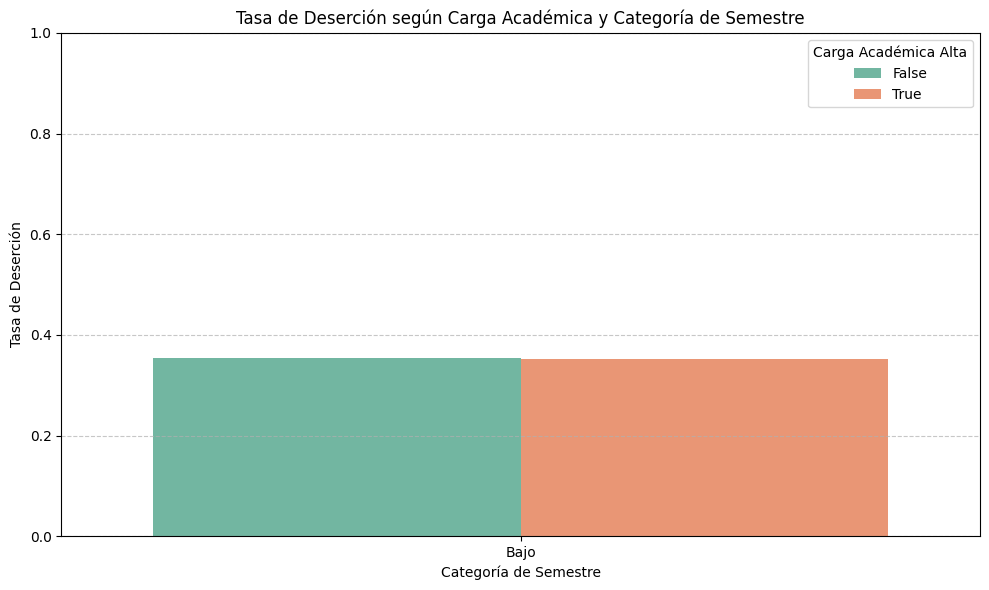

In [42]:
plt.figure(figsize=(10,6))
sns.barplot(
    data=carga_vs_semestre,
    x='categoria_semestre',
    y='tasa_desercion',
    hue='carga_academica_alta',
    palette='Set2'
)
plt.title('Tasa de Deserción según Carga Académica y Categoría de Semestre')
plt.ylabel('Tasa de Deserción')
plt.xlabel('Categoría de Semestre')
plt.ylim(0, 1)
plt.legend(title='Carga Académica Alta')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [43]:
#Fila 0
#De los 39974 estudiantes en semestres iniciales con carga
#académica no alta, el 35.46% desertó.

#Fila 1
# De los 14938 estudiantes en semestres
#iniciales con carga académica alta, el 35.27% desertó.

Tasa de deserción por programa

<ipython-input-44-ad47ac6d4bc6>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


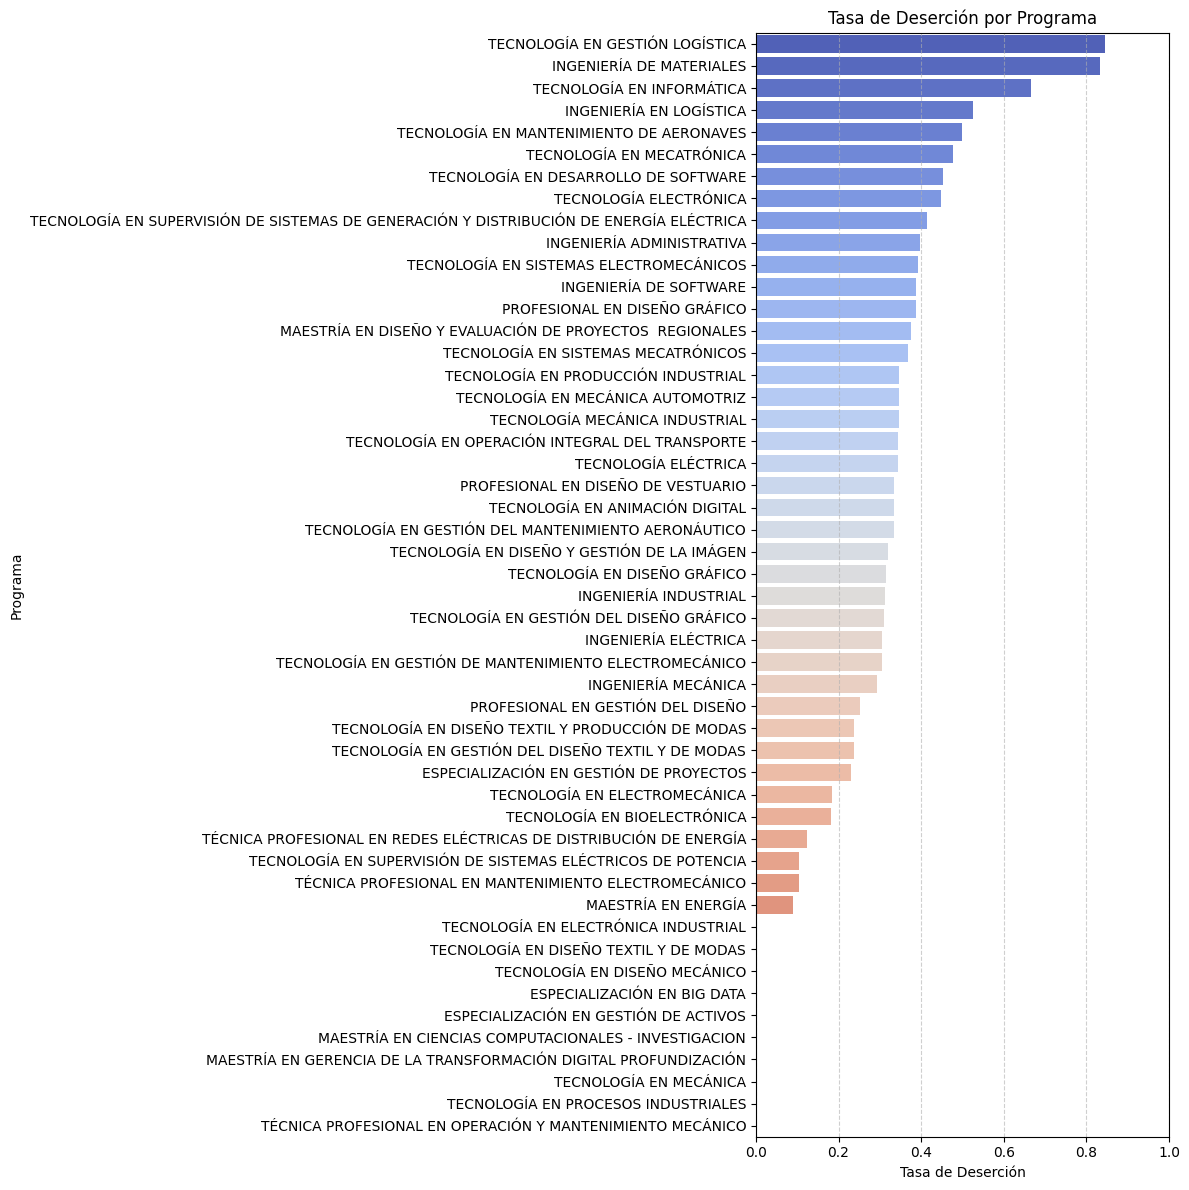

In [44]:
# Agrupar por programa
desercion_por_programa = datosl.groupby('Programa').agg(
    tasa_desercion=('desertor', 'mean'),
    cantidad=('desertor', 'count')
).reset_index().sort_values(by='tasa_desercion', ascending=False)

# Gráfico
plt.figure(figsize=(12,12))
sns.barplot(
    data=desercion_por_programa,
    y='Programa',
    x='tasa_desercion',
    palette='coolwarm'
)
plt.title('Tasa de Deserción por Programa')
plt.xlabel('Tasa de Deserción')
plt.ylabel('Programa')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


Deserción por semestre

In [45]:
# Agrupar por semestre
desercion_por_semestre = datosl.groupby('semestre').agg(
    tasa_desercion=('desertor', 'mean'),
    cantidad=('desertor', 'count')
).reset_index().sort_values(by='semestre')

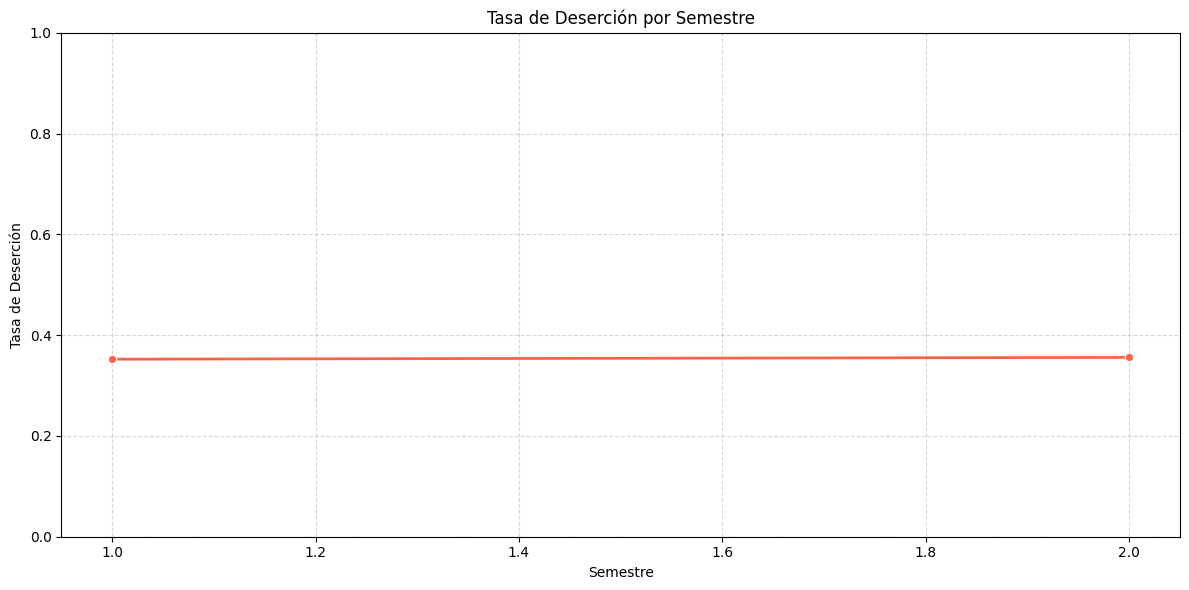

In [46]:
#visualización

plt.figure(figsize=(12, 6))
sns.lineplot(
    data=desercion_por_semestre,
    x='semestre',
    y='tasa_desercion',
    marker='o',
    linewidth=2,
    color='tomato'
)
plt.title('Tasa de Deserción por Semestre')
plt.xlabel('Semestre')
plt.ylabel('Tasa de Deserción')
plt.ylim(0, 1)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Cruce con variables de identidad y vulnerabilidad

In [47]:
#mirar 'grupo_etnico'
datosl

,Fecha de nacimiento,Edad,Programa,Tipo de programa,jornada,tipo_de_aspirante,municipio,Estrato social,Autoreconocimiento étnico,genero,...,data_tipo_de_vivienda,fecha_de_inscripcion.y,edad_rango,deserto,desertor,forma_de_pago_simplificada,es_desertor,tasa_aprobacion,carga_academica_alta,categoria_semestre
0,1997-09-12,28,INGENIERÍA ELÉCTRICA,Presencial,DIURNA,TRANSFERENCIA EXTERNA,MEDELLÍN,2.0,Afrodescendiente,Masculino,...,Familiar,2019-08-01,26-35,0,0.0,Recursos Propios,False,0.833333,True,Bajo
1,1997-05-25,28,INGENIERÍA ELÉCTRICA,Presencial,DIURNA,ESTUDIOS POR PRIMERA VEZ,MEDELLÍN,2.0,Mestizo(Mayoria Colombia),Masculino,...,Familiar,2015-08-01,26-35,0,1.0,Recursos Propios,True,0.666667,True,Bajo
2,1997-07-01,28,INGENIERÍA ELÉCTRICA,Presencial,DIURNA,ESTUDIOS POR PRIMERA VEZ,CALDAS,3.0,Mestizo(Mayoria Colombia),Masculino,...,Familiar,2015-08-01,26-35,0,1.0,Recursos Propios,True,0.333333,True,Bajo
3,1995-04-15,30,INGENIERÍA ELÉCTRICA,Presencial,DIURNA,ESTUDIOS POR PRIMERA VEZ,MEDELLÍN,3.0,Mestizo(Mayoria Colombia),Masculino,...,Familiar,2015-01-01,26-35,0,1.0,Recursos Propios,True,0.000000,False,Bajo
4,1977-11-16,48,INGENIERÍA ELÉCTRICA,Presencial,DIURNA,ESTUDIOS POR PRIMERA VEZ,MEDELLÍN,3.0,Caucasico,Masculino,...,Familiar,2016-08-01,36-50,0,0.0,Recursos Propios,False,0.500000,False,Bajo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99488,1984-09-06,41,TECNOLOGÍA EN GESTIÓN LOGÍSTICA,Virtual,VIRTUAL,ESTUDIOS POR PRIMERA VEZ,Desconocido,1.0,Afrodescendiente,Masculino,...,Familiar,2020-01-01,36-50,0,NaN,Otros Subsidios,False,0.600000,False,Bajo
99489,1984-09-06,41,TECNOLOGÍA EN GESTIÓN LOGÍSTICA,Virtual,VIRTUAL,ESTUDIOS POR PRIMERA VEZ,Desconocido,1.0,Afrodescendiente,Masculino,...,En Arriendo,2022-08-01,36-50,0,NaN,Otros Subsidios,False,0.600000,False,Bajo
99490,1997-05-28,28,TECNOLOGÍA EN MECÁNICA AUTOMOTRIZ,Regionalización,FIN DE SEMANA,ESTUDIOS POR PRIMERA VEZ,Desconocido,3.0,Mestizo(Mayoria Colombia),Masculino,...,Familiar,2016-01-01,26-35,0,NaN,Otros Subsidios,False,0.600000,False,Bajo
99491,1990-03-30,35,TECNOLOGÍA EN SUPERVISIÓN DE SISTEMAS DE GENER...,Regionalización,FIN DE SEMANA,ESTUDIOS POR PRIMERA VEZ,Desconocido,1.0,Mestizo(Mayoria Colombia),Masculino,...,En Arriendo,2020-08-01,26-35,0,NaN,Otros Subsidios,False,0.600000,False,Bajo


In [48]:
# Agrupamos por autoreconocimiento étnico
desercion_por_etnia = datosl.groupby('Autoreconocimiento étnico').agg(
    tasa_desercion=('desertor', 'mean'),
    cantidad=('desertor', 'count')
).reset_index().sort_values(by='tasa_desercion', ascending=False)


<ipython-input-49-ca18c51c7dbe>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


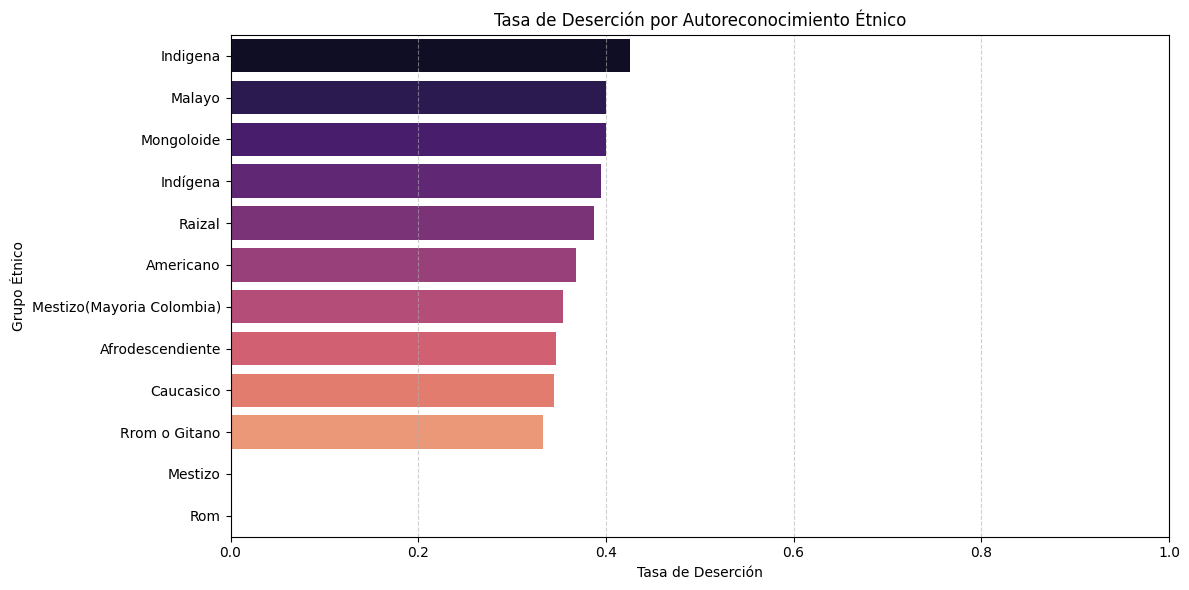

In [49]:
#visualización
plt.figure(figsize=(12,6))
sns.barplot(
    data=desercion_por_etnia,
    x='tasa_desercion',
    y='Autoreconocimiento étnico',
    palette='magma'
)
plt.title('Tasa de Deserción por Autoreconocimiento Étnico')
plt.xlabel('Tasa de Deserción')
plt.ylabel('Grupo Étnico')
plt.xlim(0, 1)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [50]:
datosl.columns

Index(['Fecha de nacimiento', 'Edad', 'Programa', 'Tipo de programa',
       'jornada', 'tipo_de_aspirante', 'municipio', 'Estrato social',
       'Autoreconocimiento étnico', 'genero', 'Víctima de conflicto armado',
       'Sede', 'Estado', 'nivel', 'forma_de_pago',
       'numero_de_asignaturas_matriculadas', 'numero_de_asignaturas_aprobadas',
       'creditos_aprobados', 'semestre', 'data_fecha_nacimiento',
       'data_ciudad_de_residencia', 'data_tipo_de_vivienda',
       'fecha_de_inscripcion.y', 'edad_rango', 'deserto', 'desertor',
       'forma_de_pago_simplificada', 'es_desertor', 'tasa_aprobacion',
       'carga_academica_alta', 'categoria_semestre'],
      dtype='object')

In [51]:
#contar NaN y nulos por columna
datosl.isna().sum()

,0
Fecha de nacimiento,0
Edad,0
Programa,0
Tipo de programa,0
jornada,0
tipo_de_aspirante,0
municipio,0
Estrato social,84
Autoreconocimiento étnico,0
genero,0


#preparación de datos

In [52]:
#antes de continuar, realizaremos una nueva limpieza
#de nuestros datos

In [53]:
# Eliminar columnas innecesarias si ya no las estamos usando
columnas_a_eliminar = ['data_fecha_nacimiento', 'fecha_de_inscripcion.y']
datosl = datosl.drop(columns=[col for col in columnas_a_eliminar if col in datosl.columns])


In [54]:
# Ver el número de NaN por columna
print(datosl.isnull().sum())

# Eliminar filas con muchos nulos (por ejemplo, más del 30%)
datosl = datosl.dropna(thresh=int(datosl.shape[1]*0.7))  # conservar filas con al menos 70% de datos


Fecha de nacimiento                       0
Edad                                      0
Programa                                  0
Tipo de programa                          0
jornada                                   0
tipo_de_aspirante                         0
municipio                                 0
Estrato social                           84
Autoreconocimiento étnico                 0
genero                                    0
Víctima de conflicto armado               0
Sede                                      0
Estado                                    0
nivel                                     0
forma_de_pago                             0
numero_de_asignaturas_matriculadas        0
numero_de_asignaturas_aprobadas           0
creditos_aprobados                        0
semestre                                  0
data_ciudad_de_residencia                 0
data_tipo_de_vivienda                     0
edad_rango                                0
deserto                         

In [55]:
# Ver el número de NaN por columna
print(datosl.isnull().sum())

# Eliminar filas con muchos nulos (por ejemplo, más del 30%)
datosl = datosl.dropna(thresh=int(datosl.shape[1]*0.7))  # conservar filas con al menos 70% de datos


Fecha de nacimiento                       0
Edad                                      0
Programa                                  0
Tipo de programa                          0
jornada                                   0
tipo_de_aspirante                         0
municipio                                 0
Estrato social                           84
Autoreconocimiento étnico                 0
genero                                    0
Víctima de conflicto armado               0
Sede                                      0
Estado                                    0
nivel                                     0
forma_de_pago                             0
numero_de_asignaturas_matriculadas        0
numero_de_asignaturas_aprobadas           0
creditos_aprobados                        0
semestre                                  0
data_ciudad_de_residencia                 0
data_tipo_de_vivienda                     0
edad_rango                                0
deserto                         

In [56]:
# Rellenar con valores más comunes o eliminar si hay pocos casos nulos
datosl['Estrato social'] = datosl['Estrato social'].fillna('Desconocido')
datosl['Autoreconocimiento étnico'] = datosl['Autoreconocimiento étnico'].fillna('No responde')
datosl['genero'] = datosl['genero'].fillna('No responde')
datosl['forma_de_pago_simplificada'] = datosl['forma_de_pago_simplificada'].fillna('Otros')

# Si quedan nulos en variables numéricas importantes, los llenamos con 0 o la mediana
datosl['numero_de_asignaturas_matriculadas'] = datosl['numero_de_asignaturas_matriculadas'].fillna(0)
datosl['numero_de_asignaturas_aprobadas'] = datosl['numero_de_asignaturas_aprobadas'].fillna(0)
datosl['creditos_aprobados'] = datosl['creditos_aprobados'].fillna(0)
datosl['semestre'] = datosl['semestre'].fillna(datosl['semestre'].median())


In [57]:
# Convertir columnas tipo objeto a string para evitar errores
for col in datosl.select_dtypes(include='object').columns:
    datosl[col] = datosl[col].astype(str)

# Quitar espacios en blanco y estandarizar texto
datosl['Autoreconocimiento étnico'] = datosl['Autoreconocimiento étnico'].str.strip().str.title()
datosl['genero'] = datosl['genero'].str.strip().str.title()
datosl['forma_de_pago_simplificada'] = datosl['forma_de_pago_simplificada'].str.strip()


In [58]:
# Ejemplo: edades menores de 10 o mayores de 100
datosl = datosl[(datosl['Edad'] >= 10) & (datosl['Edad'] <= 100)]


In [59]:
datosl.head()

,Fecha de nacimiento,Edad,Programa,Tipo de programa,jornada,tipo_de_aspirante,municipio,Estrato social,Autoreconocimiento étnico,genero,...,data_ciudad_de_residencia,data_tipo_de_vivienda,edad_rango,deserto,desertor,forma_de_pago_simplificada,es_desertor,tasa_aprobacion,carga_academica_alta,categoria_semestre
0,1997-09-12,28,INGENIERÍA ELÉCTRICA,Presencial,DIURNA,TRANSFERENCIA EXTERNA,MEDELLÍN,2.0,Afrodescendiente,Masculino,...,MEDELLÍN,Familiar,26-35,0,0.0,Recursos Propios,False,0.833333,True,Bajo
1,1997-05-25,28,INGENIERÍA ELÉCTRICA,Presencial,DIURNA,ESTUDIOS POR PRIMERA VEZ,MEDELLÍN,2.0,Mestizo(Mayoria Colombia),Masculino,...,MEDELLÍN,Familiar,26-35,0,1.0,Recursos Propios,True,0.666667,True,Bajo
2,1997-07-01,28,INGENIERÍA ELÉCTRICA,Presencial,DIURNA,ESTUDIOS POR PRIMERA VEZ,CALDAS,3.0,Mestizo(Mayoria Colombia),Masculino,...,CALDAS,Familiar,26-35,0,1.0,Recursos Propios,True,0.333333,True,Bajo
3,1995-04-15,30,INGENIERÍA ELÉCTRICA,Presencial,DIURNA,ESTUDIOS POR PRIMERA VEZ,MEDELLÍN,3.0,Mestizo(Mayoria Colombia),Masculino,...,MEDELLÍN,Familiar,26-35,0,1.0,Recursos Propios,True,0.000000,False,Bajo
4,1977-11-16,48,INGENIERÍA ELÉCTRICA,Presencial,DIURNA,ESTUDIOS POR PRIMERA VEZ,MEDELLÍN,3.0,Caucasico,Masculino,...,MEDELLÍN,Familiar,36-50,0,0.0,Recursos Propios,False,0.500000,False,Bajo


In [60]:
datosl.columns

Index(['Fecha de nacimiento', 'Edad', 'Programa', 'Tipo de programa',
       'jornada', 'tipo_de_aspirante', 'municipio', 'Estrato social',
       'Autoreconocimiento étnico', 'genero', 'Víctima de conflicto armado',
       'Sede', 'Estado', 'nivel', 'forma_de_pago',
       'numero_de_asignaturas_matriculadas', 'numero_de_asignaturas_aprobadas',
       'creditos_aprobados', 'semestre', 'data_ciudad_de_residencia',
       'data_tipo_de_vivienda', 'edad_rango', 'deserto', 'desertor',
       'forma_de_pago_simplificada', 'es_desertor', 'tasa_aprobacion',
       'carga_academica_alta', 'categoria_semestre'],
      dtype='object')

Correlaciones

In [61]:
#Primero, nos aseguramos de trabajar solo con variables que tengan sentido para la correlación (numéricas principalmente):
# Seleccionamos solo las variables numéricas
variables_numericas = datosl.select_dtypes(include=['float64', 'int64'])

# Visualizamos cuáles son
variables_numericas.columns


Index(['Edad', 'numero_de_asignaturas_matriculadas',
       'numero_de_asignaturas_aprobadas', 'creditos_aprobados', 'semestre',
       'deserto', 'desertor', 'tasa_aprobacion'],
      dtype='object')

In [62]:
if 'deserto' in datosl.columns:
    datosl = datosl.drop(columns='deserto')

In [63]:
#Matriz de correlación
#Ahora generamos la matriz de correlación,
#donde incluimos explícitamente la variable objetivo: desertor
#o es_desertor (dependiendo de cuál estés usando para marcar la deserción):
# Matriz de correlación con respecto a la deserción
correlacion = variables_numericas.corr()

# Mostramos solo la correlación con la variable de deserción
correlacion_desercion = correlacion['desertor'].sort_values(ascending=False)
print(correlacion_desercion)


desertor                              1.000000
semestre                              0.003713
Edad                                 -0.043346
numero_de_asignaturas_matriculadas   -0.147823
creditos_aprobados                   -0.208109
numero_de_asignaturas_aprobadas      -0.659985
tasa_aprobacion                      -0.720456
deserto                                    NaN
Name: desertor, dtype: float64


In [64]:
# Matriz de correlación con respecto a la deserción
correlacion = variables_numericas.corr()

# Mostramos solo la correlación con la variable de deserción
correlacion_desercion = correlacion['desertor'].sort_values(ascending=False)
print(correlacion_desercion)


desertor                              1.000000
semestre                              0.003713
Edad                                 -0.043346
numero_de_asignaturas_matriculadas   -0.147823
creditos_aprobados                   -0.208109
numero_de_asignaturas_aprobadas      -0.659985
tasa_aprobacion                      -0.720456
deserto                                    NaN
Name: desertor, dtype: float64


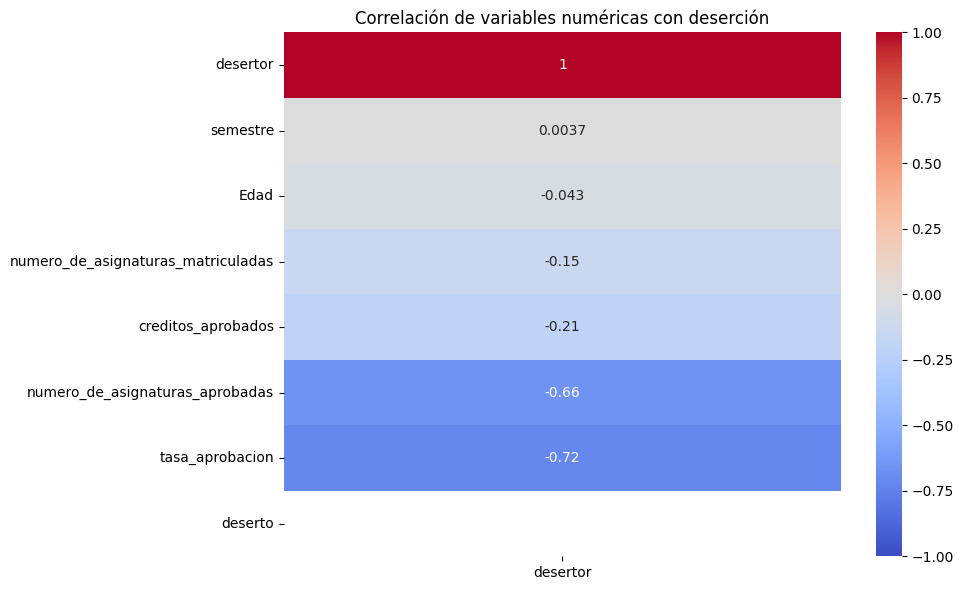

In [65]:
plt.figure(figsize=(10, 6))
sns.heatmap(correlacion[['desertor']].sort_values(by='desertor', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlación de variables numéricas con deserción')
plt.tight_layout()
plt.show()


Interpretación de la correlación con desertor
Variable	Correlación con desertor	Interpretación
tasa_aprobacion	-0.72	Fuerte correlación negativa: a mayor tasa de aprobación, menor probabilidad de desertar. Tiene mucho sentido.
numero_de_asignaturas_aprobadas	-0.66	También fuerte correlación negativa. Aprobar más materias se asocia con menos deserción.
creditos_aprobados	-0.21	Relación leve a moderada negativa.
numero_de_asignaturas_matriculadas	-0.15	Baja correlación, pero indica que matricular más materias podría estar levemente asociado con menor deserción.
Edad	-0.04	Prácticamente sin correlación.
semestre	0.0037	Nula correlación.
periodo	0.0828	Leve correlación positiva.
deserto	NaN	Probablemente es una columna duplicada o mal definida.

In [66]:
#segunda correlación
variables_categoricas = [
    'Estrato social', 'Autoreconocimiento étnico', 'genero',
    'Víctima de conflicto armado', 'jornada', 'tipo_de_aspirante',
    'forma_de_pago_simplificada', 'categoria_semestre', 'carga_academica_alta'
]

datos_dummies = pd.get_dummies(datosl, columns=variables_categoricas, drop_first=True)


In [67]:
correlacion_dummies = datos_dummies.corr(numeric_only=True)
correlacion_desertor = correlacion_dummies['desertor'].sort_values(ascending=False)
print(correlacion_desertor)


es_desertor                                               1.000000
desertor                                                  1.000000
forma_de_pago_simplificada_Matrícula Cero                 0.122074
jornada_VIRTUAL                                           0.110750
tipo_de_aspirante_REINGRESOS AUTOMATICOS                  0.063095
forma_de_pago_simplificada_Sapiencia                      0.060299
Víctima de conflicto armado_NO                            0.056987
Víctima de conflicto armado_SI                            0.033747
genero_Masculino                                          0.027026
forma_de_pago_simplificada_Generación E - MEN             0.020199
tipo_de_aspirante_ESTUDIOS POR PRIMERA VEZ                0.016447
Autoreconocimiento étnico_Indigena                        0.009798
tipo_de_aspirante_ESTUDIOS PRIMERA VEZ ESPECIALIZACIÓN    0.008655
Autoreconocimiento étnico_Indígena                        0.005095
Estrato social_3.0                                        0.00